In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Feature Engineering
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from scipy import stats
from scipy.stats import shapiro
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Model
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-dataset/credit_test.csv
/kaggle/input/my-dataset/credit_train.csv


In [2]:
train = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')
test = pd.read_csv('/kaggle/input/my-dataset/credit_test.csv')

In [3]:
train.shape

(100514, 19)

In [4]:
train.columns = train.columns.str.lower()

In [5]:
train.isna().sum()/len(train)*100

loan id                          0.511372
customer id                      0.511372
loan status                      0.511372
current loan amount              0.511372
term                             0.511372
credit score                    19.567423
annual income                   19.567423
years in current job             4.711781
home ownership                   0.511372
purpose                          0.511372
monthly debt                     0.511372
years of credit history          0.511372
months since last delinquent    53.380624
number of open accounts          0.511372
number of credit problems        0.511372
current credit balance           0.511372
maximum open credit              0.513361
bankruptcies                     0.714328
tax liens                        0.521320
dtype: float64

In [6]:
train.head()

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
train.tail()

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## Terdapat data yang hanya berisikan missing value, data tersebut dapat dihilangkan
train = train[train.isna().all(axis=1)==False]

In [9]:
train.isna().sum()/len(train)*100

loan id                          0.000
customer id                      0.000
loan status                      0.000
current loan amount              0.000
term                             0.000
credit score                    19.154
annual income                   19.154
years in current job             4.222
home ownership                   0.000
purpose                          0.000
monthly debt                     0.000
years of credit history          0.000
months since last delinquent    53.141
number of open accounts          0.000
number of credit problems        0.000
current credit balance           0.000
maximum open credit              0.002
bankruptcies                     0.204
tax liens                        0.010
dtype: float64

In [10]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [11]:
report(train)

,Column,d_type,unique_sample,n_uniques
0,loan id,object,"[14dd8831-6af5-400b-83ec-68e61888a048, 4771cc2...",81999
1,customer id,object,"[981165ec-3274-42f5-a3b4-d104041a9ca9, 2de017a...",81999
2,loan status,object,"[Fully Paid, Charged Off]",2
3,current loan amount,float64,"[445412.0, 262328.0, 99999999.0, 347666.0, 176...",22004
4,term,object,"[Short Term, Long Term]",2
5,credit score,float64,"[709.0, nan, 741.0, 721.0, 7290.0]",324
6,annual income,float64,"[1167493.0, nan, 2231892.0, 806949.0, 896857.0]",36174
7,years in current job,object,"[8 years, 10+ years, 3 years, 5 years, < 1 year]",11
8,home ownership,object,"[Home Mortgage, Own Home, Rent, HaveMortgage]",4
9,purpose,object,"[Home Improvements, Debt Consolidation, Buy Ho...",16


In [12]:
train.describe()

,current loan amount,credit score,annual income,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Terdapat kejanggalan pada data credit score dan current loan amount.

Nilai maksimal untuk credit score yang biasanya digunakan adalah 850 sedangkan nilai maksimal credit score pada data ini adalah 7510.

Nilai maksimal pada current loan amount di data ini adalah 99999999

In [13]:
train[train['credit score']>850].head()

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


In [14]:
## Handle credit score > 850
train['credit score'] = np.where(train['credit score']>850, train['credit score']/10, train['credit score'])

In [15]:
# binning credit score
def binning_credscore(value):
    if 850 >= value >= 720.0 :
        result = 'Excellent'
    elif value >= 690.0 :
        result = 'Good'
    elif value >= 630.0 :
        result = 'Fair'
    elif value <= 629.0 :
        result = 'Poor'

    else :
        result = 'credit score out of range'
    return result

In [16]:
train['credit score'] = train['credit score'].dropna().apply(binning_credscore)

In [17]:
train['credit score'].value_counts()

Excellent    44213
Good         24247
Fair         11197
Poor          1189
Name: credit score, dtype: int64

In [18]:
# Handle current loan amount yg nilainya 99999999
train['current loan amount'].replace(99999999,np.nan, inplace=True)

In [19]:
# mengubah tipe data years in current job dari string menjadi float
train['years in current job'] = train['years in current job'].str.extract(r"(\d+)")
train['years in current job'] = train['years in current job'].astype(float)

In [20]:
train['purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

In [21]:
# Mengabungkan data other dan Other di kolom purpose
train['purpose'] = train['purpose'].replace('Other','other')
train['purpose'] = train['purpose'].replace('Take a Trip', 'vacation')

In [22]:
train.purpose.value_counts()

Debt Consolidation      78552
other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
vacation                  674
major_purchase            352
small_business            283
moving                    150
wedding                   115
Educational Expenses       99
renewable_energy           10
Name: purpose, dtype: int64

## Handling Missing Value

In [23]:
train.isna().sum()

loan id                             0
customer id                         0
loan status                         0
current loan amount             11484
term                                0
credit score                    19154
annual income                   19154
years in current job             4222
home ownership                      0
purpose                             0
monthly debt                        0
years of credit history             0
months since last delinquent    53141
number of open accounts             0
number of credit problems           0
current credit balance              0
maximum open credit                 2
bankruptcies                      204
tax liens                          10
dtype: int64

In [24]:
# Kolom months since last delinquent memiliki missing value diatas 50% dari data, oleh sebab itu kolom tersebut dapat dihapus

train.drop('months since last delinquent', axis=1, inplace=True)

In [25]:
# Kolom maximum open credit dan Tax Liens memiliki sedikit missing value, drop missing value yang berada di kolom tersebut

train.dropna(subset=['maximum open credit'], inplace=True)
train.dropna(subset=['tax liens'], inplace=True)
train.dropna(subset=['bankruptcies'], inplace=True)

In [26]:
# Jumlah missing value pada kolom credit score dan kolom annual income sama, mari kita cek data tersebut
train[(train['credit score'].isna()) & (train['annual income'].isna()==False)]

,loan id,customer id,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens


Berdasarkan pengecekan, diketahui bahwa setiap missing value pada kolom credit score memiliki missing value juga pada kolom annual income.
Data tersebut dapat dihapus karena credit score dan annual income merupakan feature yang penting dalam menentukan loan status

In [27]:
train.dropna(subset=['credit score'], inplace=True)
# train.dropna(subset=['annual income'], inplace=True)

## Modeling

In [28]:
train.isna().sum()

loan id                          0
customer id                      0
loan status                      0
current loan amount          11457
term                             0
credit score                     0
annual income                    0
years in current job          3412
home ownership                   0
purpose                          0
monthly debt                     0
years of credit history          0
number of open accounts          0
number of credit problems        0
current credit balance           0
maximum open credit              0
bankruptcies                     0
tax liens                        0
dtype: int64

In [29]:
report(train)

,Column,d_type,unique_sample,n_uniques
0,loan id,object,"[14dd8831-6af5-400b-83ec-68e61888a048, 4eed4e6...",66911
1,customer id,object,"[981165ec-3274-42f5-a3b4-d104041a9ca9, 5efb2b2...",66911
2,loan status,object,"[Fully Paid, Charged Off]",2
3,current loan amount,float64,"[445412.0, nan, 347666.0, 206602.0, 217646.0]",20462
4,term,object,"[Short Term, Long Term]",2
5,credit score,object,"[Good, Excellent, Fair, Poor]",4
6,annual income,float64,"[1167493.0, 2231892.0, 806949.0, 896857.0, 118...",36128
7,years in current job,float64,"[8.0, 3.0, 10.0, 1.0, 2.0]",10
8,home ownership,object,"[Home Mortgage, Own Home, Rent, HaveMortgage]",4
9,purpose,object,"[Home Improvements, Debt Consolidation, Buy Ho...",14


In [30]:
## Drop columns yg tidak penting
train.drop(columns=['loan id', 'customer id'], axis=1, inplace=True)

In [31]:
# binning loan status
def encode_loanstatus(value):
    if  value == 'Fully Paid' :
        result = 0
    else :
        result = 1
    return result

In [32]:
train['loan status'] = train['loan status'].apply(encode_loanstatus)

In [33]:
train['loan status'].value_counts()

0    63512
1    17171
Name: loan status, dtype: int64

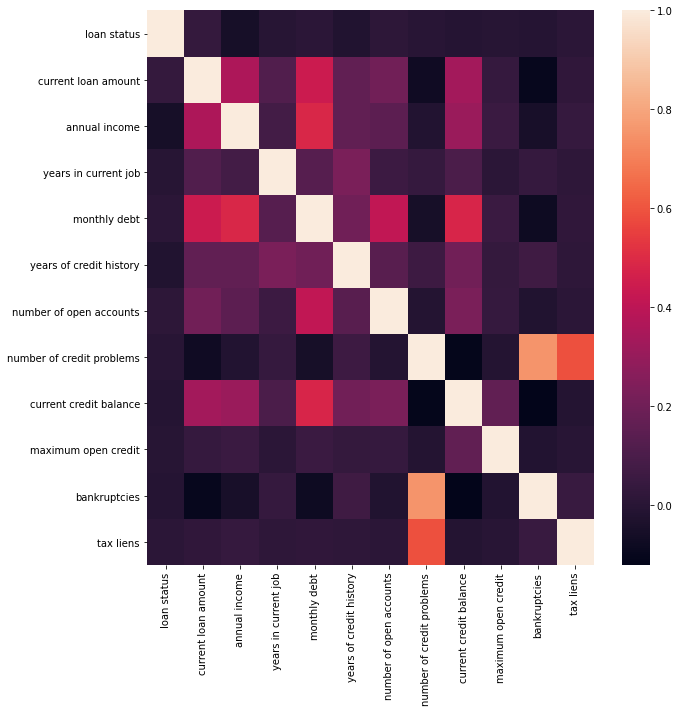

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr())
plt.tight_layout()

In [35]:
train[['number of credit problems', 'bankruptcies']].corr()

,number of credit problems,bankruptcies
number of credit problems,1.00000,0.75056
bankruptcies,0.75056,1.00000


Korelasi antara kolom `number of credit problems` dan `bankruptcies` besar

In [36]:
train[['number of credit problems', 'tax liens']].corr()

,number of credit problems,tax liens
number of credit problems,1.000000,0.588468
tax liens,0.588468,1.000000


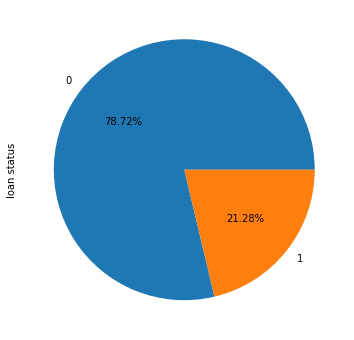

In [37]:
train['loan status'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(6,6))
plt.show()

In [38]:
x = train.drop('loan status', axis=1)
y = train['loan status']

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80683 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   current loan amount        69226 non-null  float64
 1   term                       80683 non-null  object 
 2   credit score               80683 non-null  object 
 3   annual income              80683 non-null  float64
 4   years in current job       77271 non-null  float64
 5   home ownership             80683 non-null  object 
 6   purpose                    80683 non-null  object 
 7   monthly debt               80683 non-null  float64
 8   years of credit history    80683 non-null  float64
 9   number of open accounts    80683 non-null  float64
 10  number of credit problems  80683 non-null  float64
 11  current credit balance     80683 non-null  float64
 12  maximum open credit        80683 non-null  float64
 13  bankruptcies               80683 non-null  flo

>## Normality test in numerical feature

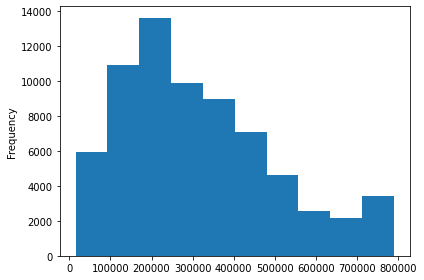

In [40]:
train['current loan amount'].plot(kind='hist')
plt.tight_layout()

In [41]:
test, pval = stats.shapiro(train['current loan amount'])

if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


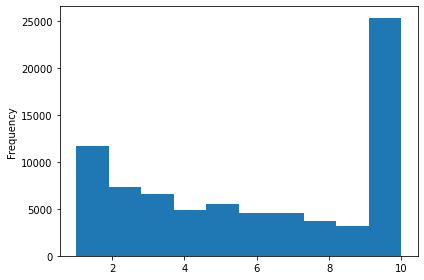

In [42]:
train['years in current job'].plot(kind='hist')
plt.tight_layout()

In [43]:
test, pval = stats.shapiro(train['years in current job'])

if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


In [44]:
report(train)

,Column,d_type,unique_sample,n_uniques
0,loan status,int64,"[0, 1]",2
1,current loan amount,float64,"[445412.0, nan, 347666.0, 206602.0, 217646.0]",20462
2,term,object,"[Short Term, Long Term]",2
3,credit score,object,"[Good, Excellent, Fair, Poor]",4
4,annual income,float64,"[1167493.0, 2231892.0, 806949.0, 896857.0, 118...",36128
5,years in current job,float64,"[8.0, 3.0, 10.0, 1.0, 2.0]",10
6,home ownership,object,"[Home Mortgage, Own Home, Rent, HaveMortgage]",4
7,purpose,object,"[Home Improvements, Debt Consolidation, Buy Ho...",14
8,monthly debt,float64,"[5214.74, 29200.53, 8741.9, 16367.74, 10855.08]",55771
9,years of credit history,float64,"[17.2, 14.9, 12.0, 17.3, 19.6]",501


In [45]:
logit = LogisticRegression(random_state=2020)
rfc = RandomForestClassifier(max_depth=10)
dtc = DecisionTreeClassifier(max_depth=10)
knn = KNeighborsClassifier(n_neighbors=5)
abc = AdaBoostClassifier(n_estimators=50)
gbc = GradientBoostingClassifier(max_depth=10)



smote = SMOTE()
ros = RandomOverSampler()
rus = RandomUnderSampler()
standard = StandardScaler()
robust = RobustScaler()
poly = PolynomialFeatures(2)

In [46]:
x.describe()

,current loan amount,annual income,years in current job,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
count,69226.000000,8.068300e+04,77271.000000,80683.000000,80683.000000,80683.000000,80683.000000,8.068300e+04,8.068300e+04,80683.000000,80683.000000
mean,314463.290527,1.378339e+06,5.995561,18522.951345,18.178758,11.146375,0.170346,2.950848e+05,7.344371e+05,0.118823,0.030118
std,187594.212217,1.080910e+06,3.501028,12231.211680,7.006343,5.027878,0.488214,3.815784e+05,6.895080e+06,0.353494,0.264975
min,15422.000000,7.662700e+04,1.000000,0.000000,3.700000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,172788.000000,8.491100e+05,3.000000,10260.190000,13.500000,8.000000,0.000000,1.127460e+05,2.719860e+05,0.000000,0.000000
50%,268598.000000,1.174371e+06,6.000000,16264.190000,16.900000,10.000000,0.000000,2.104440e+05,4.664000e+05,0.000000,0.000000
75%,434324.000000,1.650701e+06,10.000000,24059.890000,21.700000,14.000000,0.000000,3.682485e+05,7.798120e+05,0.000000,0.000000
max,789250.000000,1.655574e+08,10.000000,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80683 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan status                80683 non-null  int64  
 1   current loan amount        69226 non-null  float64
 2   term                       80683 non-null  object 
 3   credit score               80683 non-null  object 
 4   annual income              80683 non-null  float64
 5   years in current job       77271 non-null  float64
 6   home ownership             80683 non-null  object 
 7   purpose                    80683 non-null  object 
 8   monthly debt               80683 non-null  float64
 9   years of credit history    80683 non-null  float64
 10  number of open accounts    80683 non-null  float64
 11  number of credit problems  80683 non-null  float64
 12  current credit balance     80683 non-null  float64
 13  maximum open credit        80683 non-null  flo

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=2020)

## Logit

In [49]:
# pipeline for current loan amount
pipe_loanamount = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', standard)
])


pipe_exp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal'))
])


transformer = ColumnTransformer([
    ('pipe_exp', pipe_exp, ['years in current job']),
    ('pipe_loan', pipe_loanamount, ['current loan amount']),
    ('ordinal', OrdinalEncoder(), ['credit score']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['term', 'home ownership']),
    ('binary', ce.BinaryEncoder(), ['purpose']),
    ('pca', PCA(n_components=1), ['number of credit problems', 'bankruptcies']),
    ('scaler', standard, ['annual income', 'years of credit history', 'monthly debt', 'current credit balance', 'maximum open credit'])
], remainder='passthrough')


# model inializing
logit_pipe = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(logit)),
    ('resampling', smote),
    ('logit', logit)
])

## RFC

In [50]:
# pipeline for current loan amount
pipe_loanamount = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', standard)
])


pipe_exp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal'))
])


transformer = ColumnTransformer([
    ('pipe_exp', pipe_exp, ['years in current job']),
    ('pipe_loan', pipe_loanamount, ['current loan amount']),
    ('ordinal', OrdinalEncoder(), ['credit score']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['term', 'home ownership']),
    ('binary', ce.BinaryEncoder(), ['purpose']),
    ('pca', PCA(n_components=1), ['number of credit problems', 'bankruptcies']),
    ('scaler', standard, ['annual income', 'years of credit history', 'monthly debt', 'current credit balance', 'maximum open credit'])
], remainder='passthrough')


# model inializing
rfc_pipe = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(rfc)),
    ('resampling', smote),
    ('rfc', rfc)
])

## DTC

In [51]:
# pipeline for current loan amount
pipe_loanamount = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', standard)
])


pipe_exp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal'))
])

transformer = ColumnTransformer([
    ('pipe_exp', pipe_exp, ['years in current job']),
    ('pipe_loan', pipe_loanamount, ['current loan amount']),
    ('ordinal', OrdinalEncoder(), ['credit score']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['term', 'home ownership']),
    ('binary', ce.BinaryEncoder(), ['purpose']),
    ('pca', PCA(n_components=1), ['number of credit problems', 'bankruptcies']),
    ('scaler', standard, ['annual income', 'years of credit history', 'monthly debt', 'current credit balance', 'maximum open credit'])
], remainder='passthrough')


# model inializing
dtc_pipe = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(dtc)),
    ('resampling', smote),
    ('dtc', dtc)
])

## KNN

In [52]:
# pipeline for current loan amount
pipe_loanamount = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', standard)
])


pipe_exp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal'))
])

transformer = ColumnTransformer([
    ('pipe_exp', pipe_exp, ['years in current job']),
    ('pipe_loan', pipe_loanamount, ['current loan amount']),
    ('ordinal', OrdinalEncoder(), ['credit score']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['term', 'home ownership']),
    ('binary', ce.BinaryEncoder(), ['purpose']),
    ('pca', PCA(n_components=1), ['number of credit problems', 'bankruptcies']),
    ('scaler', standard, ['annual income', 'years of credit history', 'monthly debt', 'current credit balance', 'maximum open credit'])
], remainder='passthrough')


# model inializing
knn_pipe = Pipeline([
    ('transformer', transformer),
#     ('rfe', RFE(knn)),
    ('resampling', smote),
    ('knn', knn)
])

## ABC

In [53]:
# pipeline for current loan amount
pipe_loanamount = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', standard)
])


pipe_exp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal'))
])

transformer = ColumnTransformer([
    ('pipe_exp', pipe_exp, ['years in current job']),
    ('pipe_loan', pipe_loanamount, ['current loan amount']),
    ('ordinal', OrdinalEncoder(), ['credit score']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['term', 'home ownership']),
    ('binary', ce.BinaryEncoder(), ['purpose']),
    ('pca', PCA(n_components=1), ['number of credit problems', 'bankruptcies']),
    ('scaler', standard, ['annual income', 'years of credit history', 'monthly debt', 'current credit balance', 'maximum open credit'])
], remainder='passthrough')


# model inializing
abc_pipe = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(abc)),
    ('resampling', smote),
    ('abc', abc)
])

In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [55]:
skf = StratifiedKFold(n_splits=5)
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)

logit_score = cross_val_score(logit_pipe, x_train, y_train, scoring='recall', cv=rskf, verbose=1, n_jobs=-1)
rfc_score = cross_val_score(rfc_pipe, x_train, y_train, scoring='recall', cv=rskf, verbose=1, n_jobs=-1)
dtc_score = cross_val_score(dtc_pipe, x_train, y_train, scoring='recall', cv=rskf, verbose=1, n_jobs=-1)
knn_score = cross_val_score(knn_pipe, x_train, y_train, scoring='recall', cv=rskf, verbose=1, n_jobs=-1)
abc_score = cross_val_score(abc_pipe, x_train, y_train, scoring='recall', cv=rskf, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Don

In [56]:
print('Logit Val Score:', logit_score.mean())
print('RFC Val Score:', rfc_score.mean())
print('DTC Val Score:', dtc_score.mean())
print('KNN Val Score:', knn_score.mean())
print('ABC Val Score:', abc_score.mean())

Logit Val Score: 0.576217715872655
RFC Val Score: 0.6447987562453998
DTC Val Score: 0.6679840943328941
KNN Val Score: 0.4754312684103182
ABC Val Score: 0.6944239660150625


In [65]:
logit_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_exp',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=3))]),
                                    ['years in current job']),
                                   ('pipe_loan',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['current loan amount']),
                                   ('ordinal', OrdinalEncoder(),

In [58]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_exp',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=3))]),
                                    ['years in current job']),
                                   ('pipe_loan',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['current loan amount']),
                                   ('ordinal', OrdinalEncoder(),

In [59]:
dtc_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_exp',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=3))]),
                                    ['years in current job']),
                                   ('pipe_loan',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['current loan amount']),
                                   ('ordinal', OrdinalEncoder(),

In [60]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_exp',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=3))]),
                                    ['years in current job']),
                                   ('pipe_loan',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['current loan amount']),
                                   ('ordinal', OrdinalEncoder(),

In [61]:
abc_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_exp',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('binning',
                                                     KBinsDiscretizer(encode='ordinal',
                                                                      n_bins=3))]),
                                    ['years in current job']),
                                   ('pipe_loan',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['current loan amount']),
                                   ('ordinal', OrdinalEncoder(),

In [69]:
param_grid_dtc = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': [10,15,20],
    'dtc__min_samples_split': [2,5,10,20]
}



param_grid_abc = {
    'abc__n_estimators': [50, 100,200],
    'abc__learning_rate': [0.5, 1.0, 2.0]
}

In [70]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search_dtc = GridSearchCV(estimator=dtc_pipe, param_grid=param_grid_dtc, scoring='recall', cv=skf, n_jobs=-1)
grid_search_dtc.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_exp',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('binning',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           n_bins=3))]),
                                                                         ['years '
                                              

In [71]:
grid_search_dtc.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_exp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3))]),
                                                  ['years in current job']),
                                                 ('pipe_loan',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('

In [72]:
dtc_tuned = grid_search_dtc.best_estimator_
dtc_tuned_score = cross_val_score(dtc_tuned, x_train, y_train, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
dtc_tuned_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


0.6662959009404993

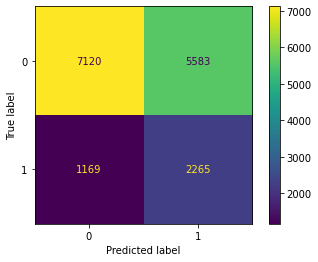

In [73]:
dtc_tuned.fit(x_train, y_train)
plot_confusion_matrix(dtc_tuned, x_test, y_test)

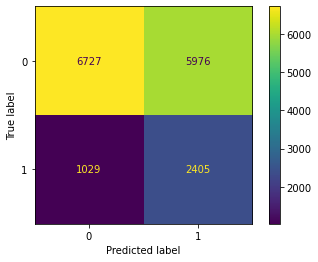

In [74]:
dtc_pipe.fit(x_train, y_train)
plot_confusion_matrix(dtc_pipe, x_test, y_test)

In [75]:
grid_search_abc = GridSearchCV(estimator=abc_pipe, param_grid=param_grid_abc, scoring='recall', cv=skf, verbose=1, n_jobs=-1)
grid_search_abc.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_exp',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('binning',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           n_bins=3))]),
                                                                         ['years '
                                              

In [76]:
abc_tuned = grid_search_abc.best_estimator_
abc_tuned_score = cross_val_score(abc_tuned, x_train, y_train, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
abc_tuned_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.9min finished


0.7071995014807739

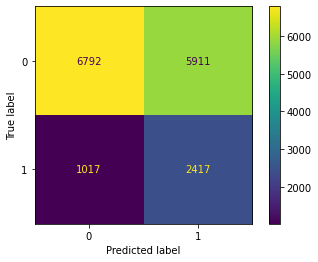

In [77]:
abc_tuned.fit(x_train, y_train)
plot_confusion_matrix(abc_tuned, x_test, y_test)

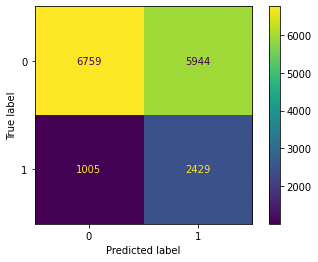

In [79]:
abc_pipe.fit(x_train, y_train)
plot_confusion_matrix(abc_pipe, x_test, y_test)

In [2]:
print("Customer who charged off but predicted to fully paid:", round(1005/(1005+6759)*100,2),"%")

Customer who charged off but predicted to fully paid: 12.94 %


Dari confusion matric di atas, dilihat bahwa model abc lebih bagus dibandingkan model dtc

## Model Evaluation

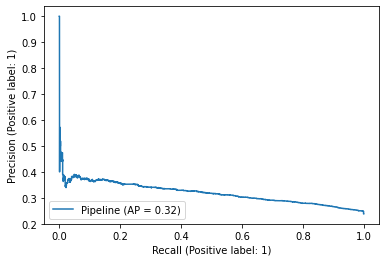

In [80]:
plot_precision_recall_curve(abc_tuned, x_test, y_test)

In [99]:
def find_thresh(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)
    y_proba = y_proba[:,1]
    prec, recall, thresh = precision_recall_curve(y_test, y_proba)
    fScore = (2 * prec * recall) / (prec + recall)
    idx = np.argmax(fScore)
    
    ##plot
    plt.figure(figsize=(8, 8))
    plt.title("Precision-Recall Curve")
    plt.plot(thresh, prec[:-1], "b-", label="Precision")
    plt.plot(thresh, recall[:-1], "r-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Threshold")
    plt.legend(loc='best')
    
    return ('Best Threshold={}, F-Score={}'.format(thresh[idx], fScore[idx]))

'Best Threshold=0.4990552628825836, F-Score=0.41705119753900244'

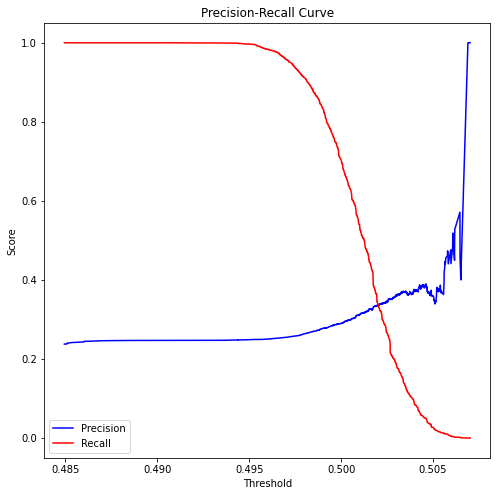

In [100]:
find_thresh(abc_tuned, x_test, y_test)

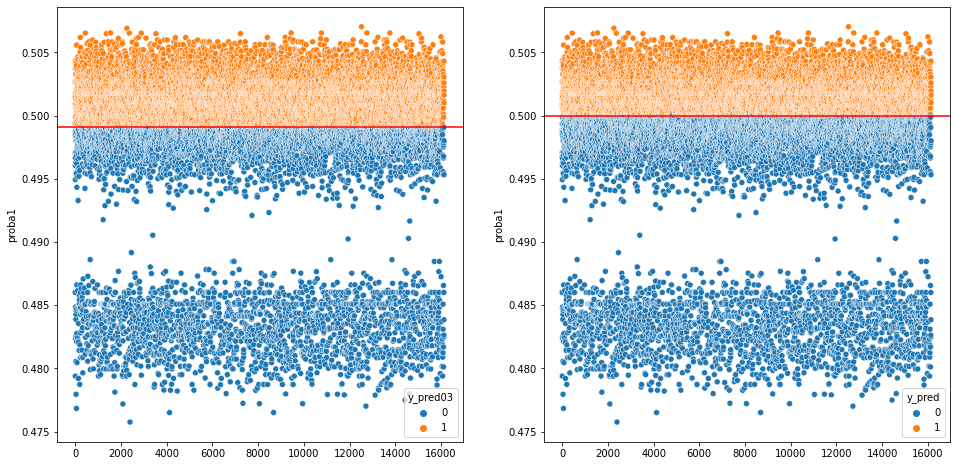

In [126]:
proba1 = abc_tuned.predict_proba(x_test)[:,1]
y_pred = abc_tuned.predict(x_test)
thresh = 0.4990552628825836
pred_03 = np.where(proba1 > thresh, 1, 0)
res_df = pd.DataFrame({'proba1': proba1, 'y_pred': y_pred, 'y_pred03': pred_03})
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred03'])
plt.axhline(thresh, color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred'])
plt.axhline(0.5, color='red')

In [127]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [128]:
make_conf_matrix(confusion_matrix(y_test, pred_03))

,p_0,p_1,total_actual
a_0,5339,7364,12703
a_1,592,2842,3434
total_prediction,5931,10206,16137


In [124]:
print("Customer who charged off but predicted to fully paid:", round(592/(592+5339)*100,2),"%")

Customer who charged off but predicted to fully paid: 9.98 %


Dengan mengatur thresholdnya, kita sudah menurunkan resiko memberikan pinjaman kepada orang yang salah sebanyak `2.96%`

In [125]:
print(classification_report(y_test, pred_03))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59     12703
           1       0.28      0.81      0.41      3434

    accuracy                           0.52     16137
   macro avg       0.59      0.62      0.50     16137
weighted avg       0.76      0.52      0.55     16137



## Pickle save

In [130]:
abc_tuned.fit(x,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_exp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3))]),
                                                  ['years in current job']),
                                                 ('pipe_loan',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('

In [131]:
filename = 'abc_final.sav'
pickle.dump(abc_tuned, open(filename, 'wb'))

## Pickle Load

In [132]:
loaded_model = pickle.load(open(filename, 'rb'))

In [133]:
loaded_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_exp',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3))]),
                                                  ['years in current job']),
                                                 ('pipe_loan',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('